![Screenshot 2023-07-16 124656.png](<attachment:Screenshot 2023-07-16 124656.png>)
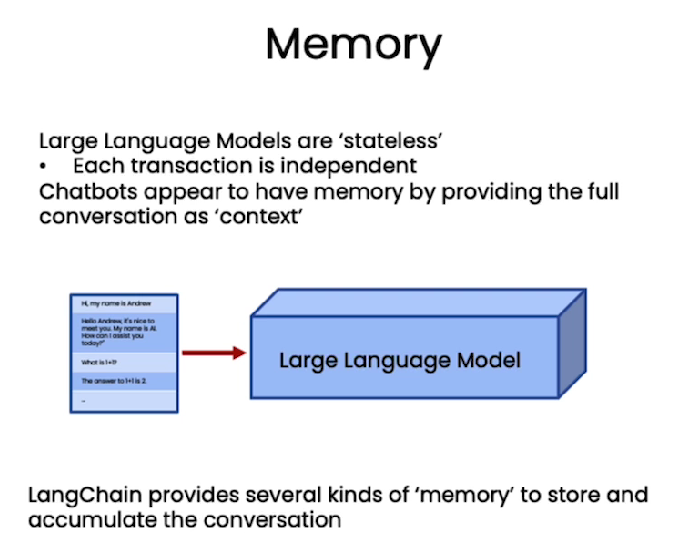

![Screenshot 2023-07-16 124904.png](<attachment:Screenshot 2023-07-16 124904.png>)
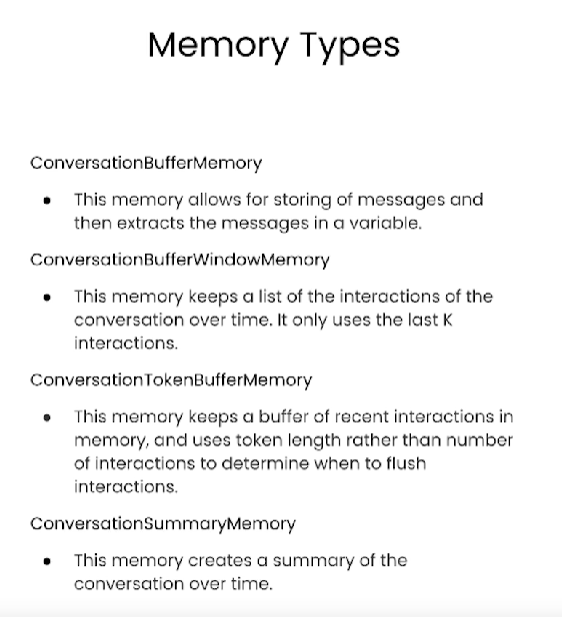

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

In [2]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [4]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [5]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: What is 1+1?
AI:

> Finished chain.


'1+1 is equal to 2.'

In [6]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 1+1?
AI: 1+1 is equal to 2.
Human: What is my name?
AI:

> Finished chain.


"I'm sorry, but I don't have access to personal information."

In [7]:
print(memory.buffer)

Human: What is 1+1?
AI: 1+1 is equal to 2.
Human: What is my name?
AI: I'm sorry, but I don't have access to personal information.


In [8]:
memory.load_memory_variables({})

{'history': "Human: What is 1+1?\nAI: 1+1 is equal to 2.\nHuman: What is my name?\nAI: I'm sorry, but I don't have access to personal information."}

In [9]:
memory = ConversationBufferMemory()

In [10]:
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [11]:
print(memory.buffer)

Human: Hi
AI: What's up


In [12]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [13]:
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [14]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## ConversationBufferWindowMemory


In [15]:
from langchain.memory import ConversationBufferWindowMemory

In [16]:
memory = ConversationBufferWindowMemory(k=1)               

In [17]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [21]:
memory.load_memory_variables({})

{'history': ''}

In [19]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=False
)

In [22]:
conversation.predict(input="Hi, my name is Andrew")

"Hello Andrew! It's nice to meet you. How can I assist you today?"

In [23]:
conversation.predict(input="What is 1+1?")

'1+1 is equal to 2.'

In [24]:
conversation.predict(input="What is my name?")

"I'm sorry, but I don't have access to personal information."

## ConversationTokenBufferMemory

In [25]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0)

In [26]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [27]:
memory.load_memory_variables({})

{'history': 'AI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [28]:
from langchain.memory import ConversationSummaryBufferMemory


In [29]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [30]:
memory.load_memory_variables({})

{'history': 'System: The human and AI exchange greetings. The human asks about the schedule for the day. The AI provides a detailed schedule, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI also mentions the need to bring a laptop to showcase the latest LLM demo during the lunch meeting.'}

In [31]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
) b

In [32]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI exchange greetings. The human asks about the schedule for the day. The AI provides a detailed schedule, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI also mentions the need to bring a laptop to showcase the latest LLM demo during the lunch meeting.
Human: What would be a good demo to show?
AI:

> Finished chain.


'A good demo to show during the lunch meeting with the customer interested in AI would be the latest LLM (Language Model) demo. The LLM is a cutting-edge AI model that can generate human-like text based on a given prompt. It has been trained on a vast amount of data and can be used for various applications such as content generation, chatbots, and language translation. By showcasing the LLM demo, you can demonstrate the capabilities and potential of AI in a practical and engaging way.'

In [33]:
memory.load_memory_variables({})

{'history': 'System: The human and AI exchange greetings and discuss the schedule for the day. The AI provides a detailed schedule, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI also mentions the need to bring a laptop to showcase the latest LLM demo during the lunch meeting. The human asks what would be a good demo to show, and the AI suggests showcasing the latest LLM (Language Model) demo. The LLM is a cutting-edge AI model that can generate human-like text based on a given prompt. It has been trained on a vast amount of data and can be used for various applications such as content generation, chatbots, and language translation. By showcasing the LLM demo, the AI believes the human can demonstrate the capabilities and potential of AI in a practical and engaging way.'}